<a href="https://colab.research.google.com/github/Fall2024CS584/Lectures/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics Of PCA
#### (And Why You Shouldn't Use Unsupervised Techniques With Supervised Problems)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [27]:
def generate_classifier_data(rnge, k, d, sizes, seed):


    rng = numpy.random.default_rng(seed=seed)
    #cs = rng.uniform(rnge[0], rnge[1], size=(k, d))
    cs = [numpy.array([0,2]), numpy.array([0, -2])]
    mb = rng.normal(loc=0, scale=1, size=(k,d))
    noise = rng.normal(loc=0, scale=0.1, size=(d,d))
    sigma_signal = numpy.matmul(mb.T, mb)
    noisy_sigma = sigma_signal + noise
    #sigma = numpy.matmul(noisy_sigma.T, noisy_sigma)
    sigma = numpy.array([[20,0], [0,1]])
    classes = [rng.multivariate_normal(c, sigma, size=size) for c, size in zip(cs,sizes)]
    ys = [j*numpy.ones(shape=(size, 1)) for j, size in enumerate(sizes)]
    xs = numpy.vstack(classes)
    ys = numpy.vstack(ys)
    return (xs, ys)


In [28]:
rnge = [-20,20]
k = 2
d = 2
sizes = [500, 500]
X, y = generate_classifier_data(rnge, k, d, sizes, 8675309)

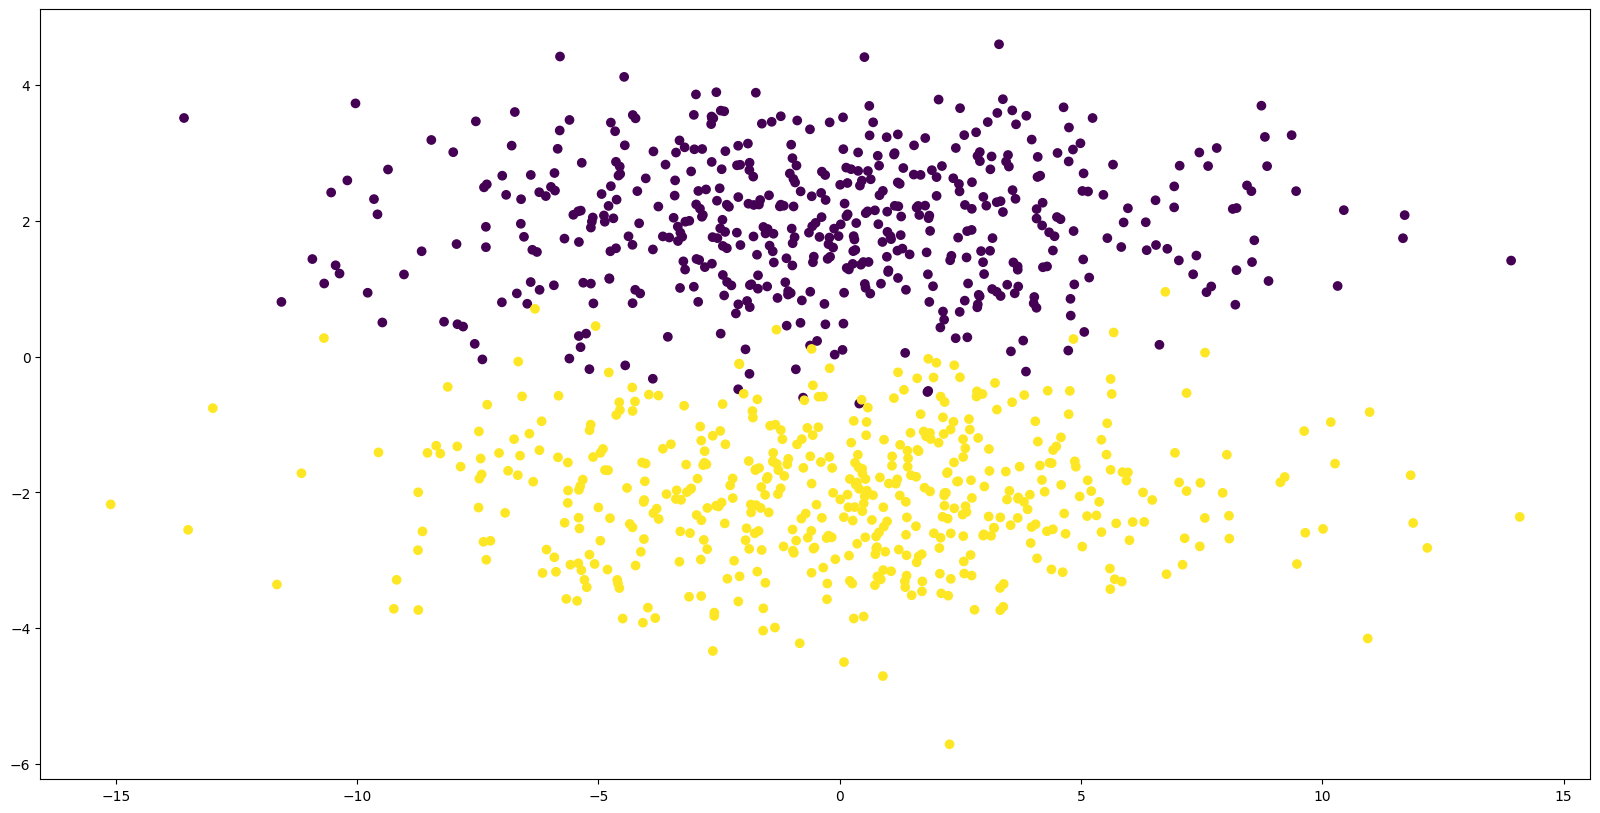

In [29]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [73]:
class PCA():
  def __init__(self):
    pass

  def fit(self, X):
    X_centered = X - X.mean(axis=0)
    self.U, self.s, self.Vt = numpy.linalg.svd(X_centered)

  def predict(self,k):
    return (numpy.matmul(self.U[:,:k], numpy.diag(s[:k])), Vt[:k, :])


In [75]:
pca = PCA()
pca.fit(X)
X_1, v_1 = pca.predict(1)

In [76]:
proj = numpy.matmul(X_1, v_1)

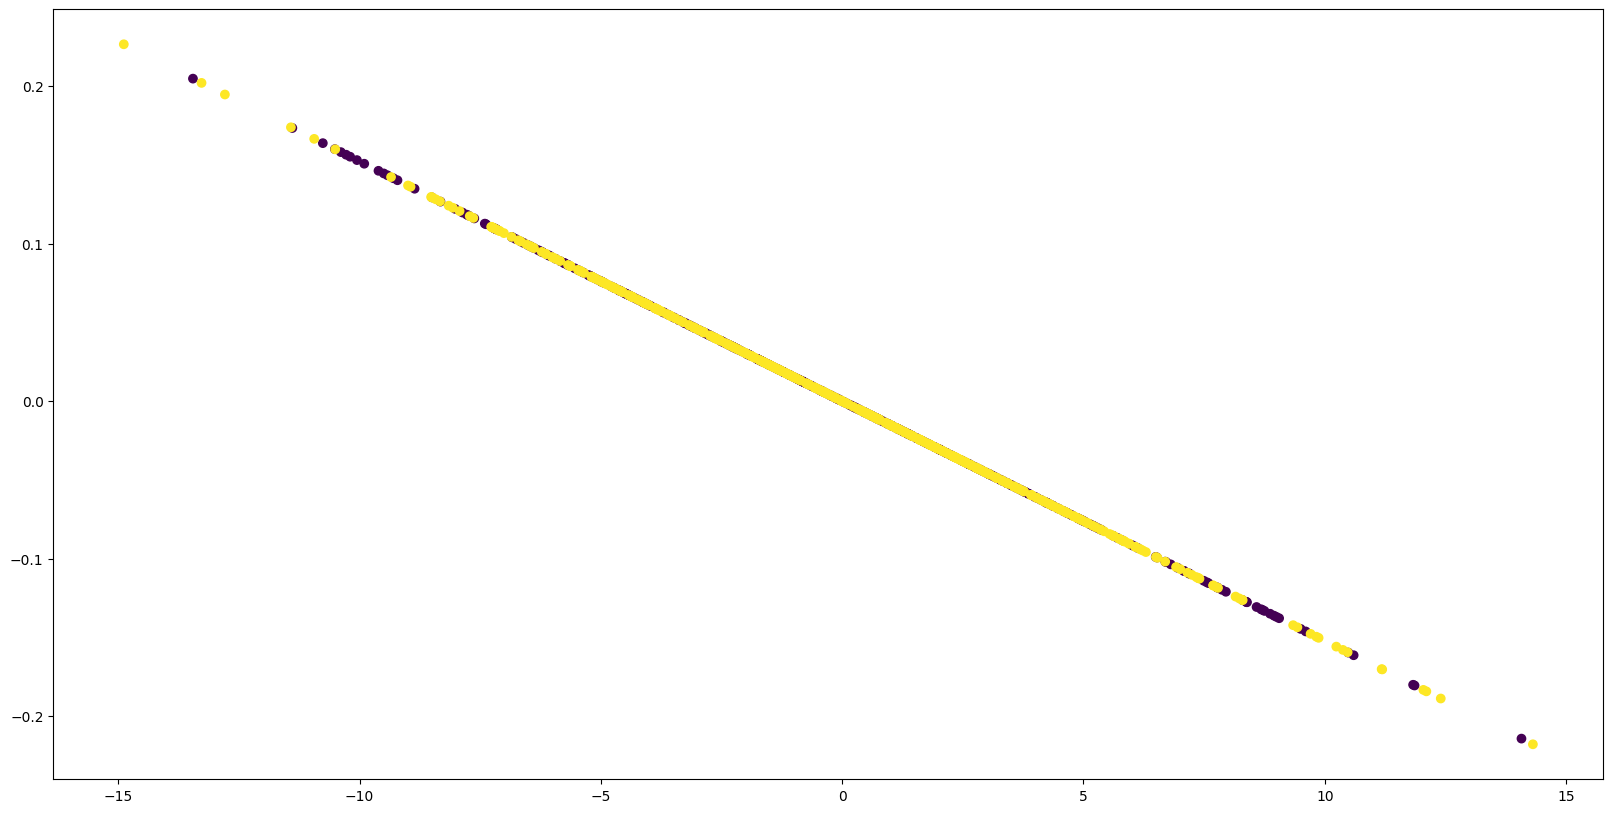

In [77]:
plt.scatter(proj[:,0], proj[:,1], c=y)
plt.show()